In [9]:
# Import necessary libraries
import pandas as pd

# 1. Load the Dataset
file_path = '/content/DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path)

# 2. Explore the Structure
print(data.head())
print(data.info())

# 3. Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# For this example, we will drop rows with missing values
data.dropna(inplace=True)

# 4. Key Statistics
statistics = data.describe()
print("Key Statistics:\n", statistics)

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
Missing Values:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
Key Statistics:
           meantemp     hum

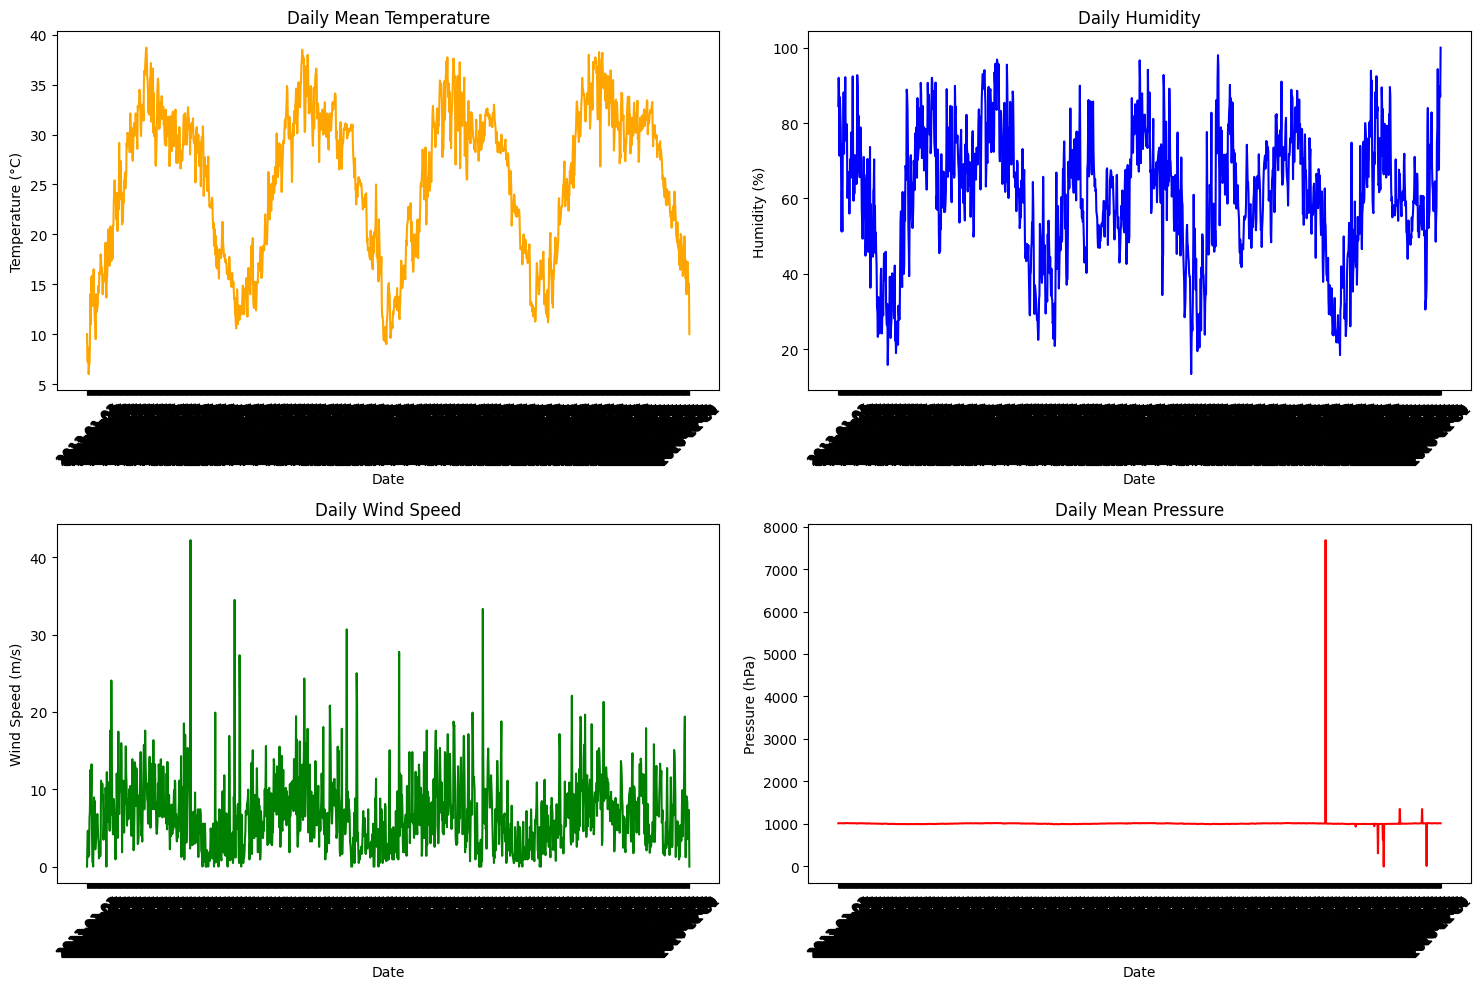

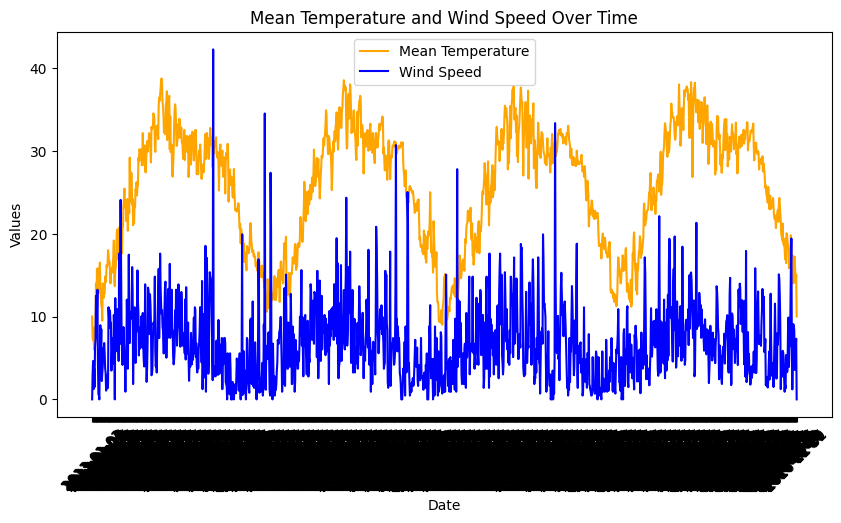

In [11]:
import matplotlib.pyplot as plt

# 1. Plot Time Series for All Variables
plt.figure(figsize=(15, 10))

# Mean Temperature
plt.subplot(2, 2, 1)
plt.plot(data['date'], data['meantemp'], label='Mean Temperature', color='orange')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

# Humidity
plt.subplot(2, 2, 2)
plt.plot(data['date'], data['humidity'], label='Humidity', color='blue')
plt.title('Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

# Wind Speed
plt.subplot(2, 2, 3)
plt.plot(data['date'], data['wind_speed'], label='Wind Speed', color='green')
plt.title('Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)

# Mean Pressure
plt.subplot(2, 2, 4)
plt.plot(data['date'], data['meanpressure'], label='Mean Pressure', color='red')
plt.title('Daily Mean Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Visualize Relationship Between Temperature and Wind Speed
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['meantemp'], label='Mean Temperature', color='orange')
plt.plot(data['date'], data['wind_speed'], label='Wind Speed', color='blue')
plt.title('Mean Temperature and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

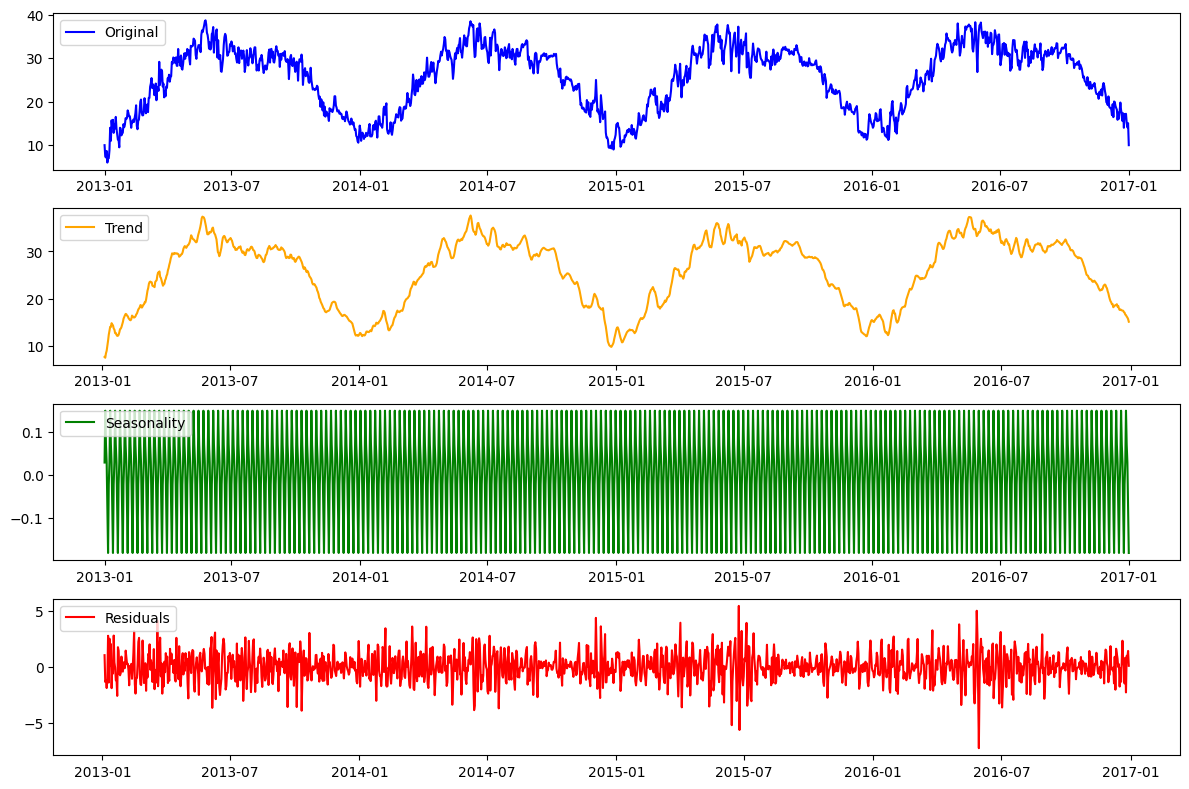

In [12]:
import statsmodels.api as sm

# 1. Decompose Time Series for Daily Mean Temperature
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(data['meantemp'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['meantemp'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 2. Identify Seasonal Patterns
# Discuss the significance of seasonal patterns observed in the decomposition.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Select Variable for Forecasting
forecast_variable = 'meantemp'

# 2. Split Dataset into Training and Testing Sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# 3. Fit Seasonal Decomposition of Time Series (STL) Model
stl = sm.tsa.STL(train[forecast_variable], seasonal=13)
result = stl.fit()

# 4. Evaluate Forecasting Performance
# Forecasting using the trend and seasonal components
forecast = result.trend[-len(test):] + result.seasonal[-len(test):]

# Calculate MAE and RMSE
mae = mean_absolute_error(test[forecast_variable], forecast)
rmse = mean_squared_error(test[forecast_variable], forecast) ** 0.5  # Calculate RMSE by taking the square root of MSE

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 6.728980921670972
Root Mean Squared Error (RMSE): 8.225269735647533
